**INFORMATION**

```
Panther's ID:       6314061
Student's Name:     Quang Tuan Le
Professor's Name:   Prof. Ron Zacharski
Semester:           Spring 2023 - CAP4770 
```

**Intro to Data Mining**

**Project #4 - AMAZON REVIEW**

Description:

For our project we are going to use a dataset of Amazon Musical Instrument Reviews. The main reason I selected this dataset is that it is significantly smaller than the Amazon review datasets for movies, music, and books. This dataset has a bit over 221,000 reviews. 


You are to develop a classifier that predicts the rating.

The file with the training data is at http://34.82.108.37/amazonReviewsTrain.csv.zip

Once you are done training and tuning your classify you should run it on the test data.

The file with the test data is http://34.82.108.37/amazonReviewsTest.csv

Your predictions for the test set should be in a text file named amazonReviewsPredictions.txt that is placed in the same github directory as your Jupyter notebook file containing your code and comments.

#### **1) Prepare Dataset to Process**

In [2]:
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip

--2023-04-11 19:01:27--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  12.0MB/s    in 3.1s    

2023-04-11 19:01:31 (12.0 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]



In [3]:
!unzip amazonReviewsTrain.csv.zip

Archive:  amazonReviewsTrain.csv.zip
  inflating: amazonReviewsTrain.csv  


In [4]:
!wget http://34.82.108.37/amazonReviewsTest.csv

--2023-04-11 19:01:40--  http://34.82.108.37/amazonReviewsTest.csv
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4240573 (4.0M) [application/octet-stream]
Saving to: ‘amazonReviewsTest.csv’

amazonReviewsTest.c 100%[===================>]   4.04M  3.22MB/s    in 1.3s    

2023-04-11 19:01:42 (3.22 MB/s) - ‘amazonReviewsTest.csv’ saved [4240573/4240573]



#### **2) Import Necessary Libraries**

In [5]:
# import the pandas library
import pandas as pd

# import the numpy library
import numpy as np 

# import Tokenizer library
from keras.preprocessing.text import Tokenizer

# import pad_sequences library
from keras.utils import pad_sequences

# import train_test_split
from sklearn.model_selection import train_test_split

# import to_categorical utilities
from keras.utils import to_categorical

# import keras models, layers library to define models
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

#### **3) Analyze Data & Train Data**

##### **Download all dataset**

In [6]:
# read csv file for training dataset
import pandas as pd
training_data = pd.read_csv('amazonReviewsTrain.csv')
training_data

<ipython-input-6-720e257bee18>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv('amazonReviewsTrain.csv')


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,positive
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,positive
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,positive
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
221387,True,"08 16, 2015",A1TWEBKVZDD2JJ,B0002H05BA,Obey Giant,Still hard to beat D'Addario. Hope they keep i...,Five Stars,1439683200,NaN,"{'Size:': ' Regular Light, 10-46', 'Style:': '...",NaN,positive
221388,True,"01 8, 2012",AP32V2GXAK9VM,B000WME8C2,Grey,Ortofon hits the nail right on the head with t...,Headshell Impovment? YES!!!,1325980800,7.0,{'Color:': ' Black'},NaN,positive
221389,True,"10 22, 2017",A4BIHE0AYAMTP,B00MD7S06O,divbyzero,This is my absolute favorite guitar strap amon...,ecclesiastical / hippie,1508630400,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,positive
221390,True,"01 9, 2016",A3OCE03MZ2PC2J,B0017PLYCK,scaper,nice,Five Stars,1452297600,NaN,NaN,NaN,positive


In [7]:
# load testing data set into testing_data
import pandas as pd
testing_data = pd.read_csv('amazonReviewsTest.csv')
testing_data

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,False,"08 17, 2016",AMKHFIJJ81LYJ,B00EA1U1X6,Frank P.,I am a (very amateur) EDM and Hip Hop Producer...,Extremely Happy.,1471392000,NaN,"{'style:': ' 5"" Monitor Speaker'}",NaN
1,True,"08 22, 2015",A3SZ045Z7CP56,B0002GNUYU,David A. Caufield,These are pretty beefy strings even for black ...,"once again, Rotosound strings fail to impress ...",1440201600,NaN,NaN,NaN
2,True,"07 30, 2014",AZMSVSJFACBPB,B0006LOBA8,Neurofizz,"I've played every new ""improved"" string out th...",and keep coming home to the girls that really ...,1406678400,NaN,NaN,NaN
3,True,"03 9, 2012",A39SRYB2M0Z5FG,B000Y30NAA,s.reeths,"I thought I would give this pedal a try, becau...",save up for a better pedal,1331251200,NaN,{'Style:': ' CHORUS'},NaN
4,True,"02 3, 2013",A35A62ZXXKXHIW,B002N4ZBE6,Marine Docl,Been wanting to try one for over a year. Good...,Big Six,1359849600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,"09 30, 2015",A3QXBRMHPZPIIP,B00GTVF6VC,Julie,I took it off my guitar! I would rather look a...,Save your money!!,1443571200,7.0,NaN,NaN
9996,True,"12 22, 2017",A3CN2KXSYK5HSX,B0002KZDN2,Manth,Better than the stock part on non-USA made gui...,Four Stars,1513900800,NaN,NaN,NaN
9997,True,"03 29, 2011",AVO7MT1IJAM31,B0026IC6S8,GM,I'm updating this review after using the violi...,First Violin Purchase,1301356800,27.0,"{'Size:': ' 4/4', 'Color:': ' Traditional Brow...",NaN
9998,False,"04 30, 2014",A1XIPYWY6LXKAO,B0042GBDLI,Patrick W. Schubert,A lot of sound research and engineering go int...,Another winner from Hardwire!,1398816000,3.0,NaN,NaN


Show how many unique labels to classify.

In [8]:
# get unique rating
training_data['rating'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

To train the review text, I change to its column to string type.

In [9]:
# cast the data type of reviewText to string
training_data.reviewText = training_data.reviewText.astype(str)

I also change the value of labels into number.

In [10]:
data_text = training_data.reviewText
data_label = training_data.rating
# Need to change because we have more than 2 values for sentiment
data_label = training_data['rating'].apply(lambda x: 0 if x == 'negative' else 1 if x == 'neutral' else 2)
data_text

0                Have 30 of these in operation great lights
1         Good replacement.  I prefer my Rovner L5, but ...
2         My son & band teacher loves it. Really nice. B...
3         This was a gift for a friend who is a fan of t...
4         Wish it would attach to my violin a little eas...
                                ...                        
221387    Still hard to beat D'Addario. Hope they keep i...
221388    Ortofon hits the nail right on the head with t...
221389    This is my absolute favorite guitar strap amon...
221390                                                 nice
221391    This polishing cloth is well-made and a great ...
Name: reviewText, Length: 221392, dtype: object

##### **Pre-processing the data text**

Tokenized the text into sequences of integers

In [11]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000)
#build the word index
tokenizer.fit_on_texts(data_text)
# now convert the words to integers
data_sequences = tokenizer.texts_to_sequences(data_text)
data_sequences[0]

[18, 534, 9, 25, 13, 2199, 22, 570]

Limited each text to 50 words

In [12]:
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 50

from keras.utils import pad_sequences

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
data50 = pad_sequences(data_sequences, maxlen=maxlen)
data50[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   18,  534,
          9,   25,   13, 2199,   22,  570], dtype=int32)

##### **Divide the sequences and labels into training and testing data**

In [13]:
from sklearn.model_selection import train_test_split
train50, test50, train_labels, test_labels = train_test_split(data50, data_label, test_size = 0.2, random_state=42)
test_labels

5028      0
133605    2
182161    2
137498    2
122233    1
         ..
45935     2
5691      2
83947     2
214291    1
8033      1
Name: rating, Length: 44279, dtype: int64

Categorical the labels

In [14]:
from keras.utils import to_categorical

#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

# cast label into categorical for fitting and evaluating
categorical_train_labels = to_categorical(train_labels)
categorical_test_labels = to_categorical(test_labels)

------

##### **I am going to work on pre-trained word embeddings**

Download the GloVe word embeddings

In [15]:
# download the GloVe word embeddings
!curl http://zacharski.org/files/courses/cs419/glove.6B.100d.zip > glove.6B.100d.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128M  100  128M    0     0  11.4M      0  0:00:11  0:00:11 --:--:-- 13.7M
amazonReviewsTest.csv	amazonReviewsTrain.csv.zip  sample_data
amazonReviewsTrain.csv	glove.6B.100d.zip


Unzip it.

In [16]:
# unzip it
!unzip glove.6B.100d.zip

Archive:  glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


**Pre-process the embeddings**

Parse the un-zipped file (it's a txt file) to build an index mapping words (as strings) to their vector representation (as number vectors).

In [17]:
# Credit: Prof. Ron Zacharski
# These steps to build an embedding_index
import numpy as np

embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Build an embedding matrix to be able to load into an Embedding layer.

In [18]:
# Credit: Prof. Ron Zacharski
# These steps to build an embedding_matrix
embedding_dim = 100
max_words = 20000
word_index = tokenizer.word_index

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

-----


The next process will be to build model, compile, and fit the training data set.

##### **Define a model**

In [19]:
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 48, 64)            19264     
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout (Dropout)           (None, 46, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                        

Load the GloVe matrix that already prepared into Embedding layer. 

Not freeze the embedding layer also to continue to refine the embeddings using the training data.

In [20]:
# load GloVe matrix to the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

Let's compile and fit the model.

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train50, categorical_train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    validation_steps=50)

Epoch 1/10
4428/4428 [==============================] - 64s 12ms/step - loss: 0.3966 - acc: 0.8702 - val_loss: 0.3881 - val_acc: 0.8631
Epoch 2/10
4428/4428 [==============================] - 22s 5ms/step - loss: 0.3554 - acc: 0.8807 - val_loss: 0.3587 - val_acc: 0.8694
Epoch 3/10
4428/4428 [==============================] - 21s 5ms/step - loss: 0.3404 - acc: 0.8857 - val_loss: 0.3940 - val_acc: 0.8719
Epoch 4/10
4428/4428 [==============================] - 20s 5ms/step - loss: 0.3328 - acc: 0.8885 - val_loss: 0.3462 - val_acc: 0.8744
Epoch 5/10
4428/4428 [==============================] - 20s 5ms/step - loss: 0.3297 - acc: 0.8900 - val_loss: 0.3381 - val_acc: 0.8800
Epoch 6/10
4428/4428 [==============================] - 21s 5ms/step - loss: 0.3285 - acc: 0.8903 - val_loss: 0.3421 - val_acc: 0.8825
Epoch 7/10
4428/4428 [==============================] - 19s 4ms/step - loss: 0.3315 - acc: 0.8908 - val_loss: 0.3366 - val_acc: 0.8825
Epoch 8/10
4428/4428 [==============================] 

I would like to draw the graph to see how it works, and how much overfitting occurred.

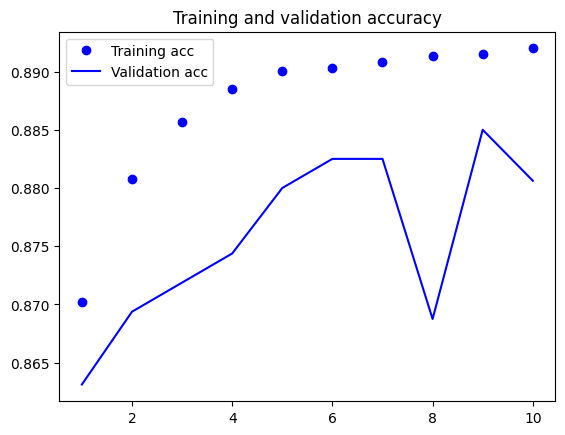

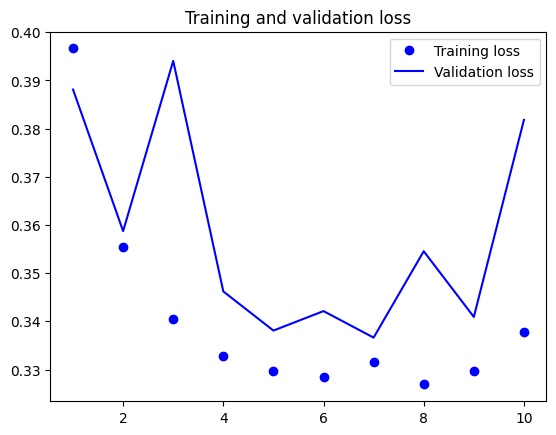

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### **Evaluate to get the accuracy and loss**

In [23]:
test_loss, test_acc, = model.evaluate(test50, categorical_test_labels)
print("Accuracy %f    Loss: %f" % (test_acc, test_loss))

1384/1384 [==============================] - 3s 3ms/step - loss: 0.3900 - acc: 0.8907
Accuracy 0.890693    Loss: 0.390006


#### **4) Re-check the evaluation**

Basically I can use my model to export file to submit. However, before I do that, I want to make sure that my export txt file has to be correct.

Therefore, I will do the steps to get the list of labels for the above test50 (I assume that I have not known the test_labels)

I'm going to predict on test50

In [24]:
# get predictions result
test50_predictions = model.predict(test50)
test50_predictions

1384/1384 [==============================] - 2s 2ms/step


array([[6.13192767e-02, 1.26130402e-01, 8.12550366e-01],
       [1.21109625e-02, 4.74768318e-02, 9.40412164e-01],
       [2.75614962e-04, 1.87547896e-02, 9.80969548e-01],
       ...,
       [6.08676619e-17, 2.82769475e-10, 1.00000000e+00],
       [2.23340213e-01, 2.56281674e-01, 5.20378113e-01],
       [1.72371671e-01, 2.43366927e-01, 5.84261417e-01]], dtype=float32)

This function convert predictions to labels by choosing the best probability and then map to the corresponding label.

In [25]:
def convert_predictions_to_labels(predictions):
  # create a dictionary mapping label indices to label names
  label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
  
  # convert each predicted probability to its corresponding label name
  labels = [label_map[np.argmax(prediction)] for prediction in predictions]
  
  return labels

In [26]:
# get label from test50 predictions
test50_predicted_label = convert_predictions_to_labels(test50_predictions)

In [ ]:
test50_predicted_label

In [28]:
test_labels

5028      0
133605    2
182161    2
137498    2
122233    1
         ..
45935     2
5691      2
83947     2
214291    1
8033      1
Name: rating, Length: 44279, dtype: int64

Here is the test_labels.

In [29]:
import numpy as np

label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
label_names = test_labels.map(label_map)
print(label_names)

5028      negative
133605    positive
182161    positive
137498    positive
122233     neutral
            ...   
45935     positive
5691      positive
83947     positive
214291     neutral
8033       neutral
Name: rating, Length: 44279, dtype: object


From list of labels and series of test_labels (when doing the train_test_split), I count how many choices are correct.

In [30]:
# Count how many match choices between list and series (testing_labels)
def count_matching_word(s, word_list):
  count = 0
  s = s.reset_index(drop=True)
  for i in range(len(word_list)):
    if (s[i] == word_list[i]):
      count += 1
  return count

In [31]:
matches = count_matching_word(label_names, test50_predicted_label)
print(matches)

39439


In [32]:
39439/44279

0.8906931050836739

89.0693% is match with the result we used evaluate function. So, I think the functions are fine.

#### **5) Try another Model to choose**

The same steps but I change the model sequence a little bit.

In [37]:
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

another_model = Sequential()
another_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
another_model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
another_model.add(layers.MaxPooling1D(pool_size=2))
another_model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
another_model.add(layers.Dropout(0.5))
another_model.add(layers.MaxPooling1D(pool_size=2))
another_model.add(Flatten())
another_model.add(Dense(32, activation='relu'))
another_model.add(Dense(3, activation='softmax'))
another_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           2000000   
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 64)            19264     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            12352     
                                                                 
 dropout_3 (Dropout)         (None, 22, 64)            0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 11, 64)           0         
 1D)                                                  

In [38]:
another_model.layers[0].set_weights([embedding_matrix])
another_model.layers[0].trainable = True

In [39]:
another_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
another_history = another_model.fit(train50, categorical_train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    validation_steps=50)

Epoch 1/10
4428/4428 [==============================] - 46s 10ms/step - loss: 0.3875 - acc: 0.8727 - val_loss: 0.3868 - val_acc: 0.8700
Epoch 2/10
4428/4428 [==============================] - 22s 5ms/step - loss: 0.3419 - acc: 0.8845 - val_loss: 0.3566 - val_acc: 0.8725
Epoch 3/10
4428/4428 [==============================] - 21s 5ms/step - loss: 0.3324 - acc: 0.8875 - val_loss: 0.3372 - val_acc: 0.8788
Epoch 4/10
4428/4428 [==============================] - 20s 4ms/step - loss: 0.3303 - acc: 0.8888 - val_loss: 0.3500 - val_acc: 0.8775
Epoch 5/10
4428/4428 [==============================] - 21s 5ms/step - loss: 0.3256 - acc: 0.8898 - val_loss: 0.3749 - val_acc: 0.8769
Epoch 6/10
4428/4428 [==============================] - 20s 5ms/step - loss: 0.3225 - acc: 0.8914 - val_loss: 0.3504 - val_acc: 0.8819
Epoch 7/10
4428/4428 [==============================] - 19s 4ms/step - loss: 0.3161 - acc: 0.8926 - val_loss: 0.3468 - val_acc: 0.8813
Epoch 8/10
4428/4428 [==============================] 

In [40]:
another_test_loss, another_test_acc, = another_model.evaluate(test50, categorical_test_labels)
print("Accuracy %f    Loss: %f" % (another_test_acc, another_test_loss))

1384/1384 [==============================] - 5s 3ms/step - loss: 0.3414 - acc: 0.8900
Accuracy 0.890038    Loss: 0.341434


So, I decide to choose the first one.

#### **6) Generating the TXT file**

From what I research, I will use these function to generate predicted text.

In [41]:
testing_data_text = testing_data.reviewText
testing_data_text

0       I am a (very amateur) EDM and Hip Hop Producer...
1       These are pretty beefy strings even for black ...
2       I've played every new "improved" string out th...
3       I thought I would give this pedal a try, becau...
4       Been wanting to try one for over a year.  Good...
                              ...                        
9995    I took it off my guitar! I would rather look a...
9996    Better than the stock part on non-USA made gui...
9997    I'm updating this review after using the violi...
9998    A lot of sound research and engineering go int...
9999    This is my second stand like this. Looks reall...
Name: reviewText, Length: 10000, dtype: object

##### **Pre-processing the testing data also**

I just do the same step that we did for data_text (train50 & test50)

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

def tokenize_sequences(data):
  maxlen = 50
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(data)
  sequences = tokenizer.texts_to_sequences(data)
  padded_sequences = pad_sequences(sequences, maxlen=maxlen)
  return padded_sequences

testing_sequences = tokenize_sequences(testing_data_text)
testing_sequences[0]

array([ 358,    4,   22,  403,  132,    5, 2523,   11,  953,   12,   11,
         27,  122,  315,  247,   25,  264, 1899,   49,  507,  396, 1526,
        354,   13,  847, 4845,  865, 2346,  235,   17,  246,   19,   58,
        366,  107,    7,  366,  107,    7,  974, 2191, 1527,   12,  122,
       2633, 1186,   69,  138, 2270,  342], dtype=int32)

Get predictions and convert them into list

In [43]:
predictions_on_testing_dataset = model.predict(testing_sequences)
predictions_on_testing_dataset

313/313 [==============================] - 1s 3ms/step


array([[1.23869935e-02, 5.16077504e-02, 9.36005235e-01],
       [1.02785998e-05, 1.54841482e-03, 9.98441279e-01],
       [2.93029994e-02, 7.55960271e-02, 8.95100951e-01],
       ...,
       [2.22316012e-02, 6.42248094e-02, 9.13543642e-01],
       [1.56575590e-02, 5.39861619e-02, 9.30356324e-01],
       [4.94609736e-02, 1.05718493e-01, 8.44820499e-01]], dtype=float32)

In [44]:
predicted_labels = convert_predictions_to_labels(predictions_on_testing_dataset)
with open('amazonReviewsPredictions.txt', 'w') as f:
  for label in predicted_labels:
    f.write(label + '\n')

Now I am going to test on amazonReviewsTest and to use test() function from Prof. Ron Zacharski to export my predictions.

In [46]:
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")
test()

'file looks ok'

From what I learned before doing this project, I have used:
- BagOfWords (the Deep Learning in NLP lab)
- SequenceOfSequence (Using Word Embedding with and without pre-trained in the Word Embedding lab)

I prefer to use Word Embedding approach with pre-trained GloVe.